In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import linear_model
import seaborn as sns
import yfinance as yf
%matplotlib widget
sns.set_style("darkgrid")
sns.set(font_scale=1.7)


In [2]:
def pair(buy_ticker, sell_ticker, long_financials, short_financials):

    ticker1 = yf.Ticker(buy_ticker)
    ticker2 = yf.Ticker(sell_ticker)
    beta_ticker = yf.Ticker("SPY")

    dataFrame1 = ticker1.history(
        start='2010-1-1', actions=True, rounding=True)
    dataFrame2 = ticker2.history(
        start='2010-1-1', actions=True, rounding=True)
    spy = beta_ticker.history(
        start='2010-1-1', actions=True, rounding=True)

    ratio = dataFrame1.Close / dataFrame2.Close
    spread = dataFrame1.Close - dataFrame2.Close

    chart = fig, axes = plt.subplots(3, figsize=(18, 12))
    axes[0].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=dataFrame1, x="Date", y="Close",
                 ax=axes[0], label=buy_ticker)
    sns.lineplot(data=dataFrame2, x="Date", y="Close",
                 ax=axes[0], label=sell_ticker)
    axes[1].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=ratio, ax=axes[1])
    axes[2].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=spread, ax=axes[2])
    plt.tight_layout(pad=1)

    spy_ticker1 = pd.concat(
        [spy.Close[-500::], dataFrame1.Close[-500::]], axis=1)
    spy_ticker1.columns = ["SPY", buy_ticker]
    long_data_pct = np.log(spy_ticker1/spy_ticker1.shift())
    ticker1_cov = long_data_pct.cov().iloc[0, 1]
    ticker1_var = long_data_pct["SPY"].var()
    long_beta = ticker1_cov/ticker1_var
    print("Long BETA:", np.round(long_beta, 2))

    spy_ticker2 = pd.concat(
        [spy.Close[-500::], dataFrame2.Close[-500::]], axis=1)
    spy_ticker2.columns = ["SPY", sell_ticker]
    short_data_pct = np.log(spy_ticker2/spy_ticker2.shift())
    ticker2_cov = short_data_pct.cov().iloc[0, 1]
    ticker2_var = short_data_pct["SPY"].var()
    short_beta = ticker2_cov/ticker2_var
    print("Short BETA:", np.round(short_beta, 2))

    # financials:
    print(long_financials)
    print(short_financials)

    return chart


Long BETA: 0.79
Short BETA: 1.72
LONG position FULT P/E ratio=11.22, dividend: 0.03, Gross Profit: 935988
SHORT position AMKR P/E ratio = 7.11, dividend: 0.01, Gross profit: 1225554


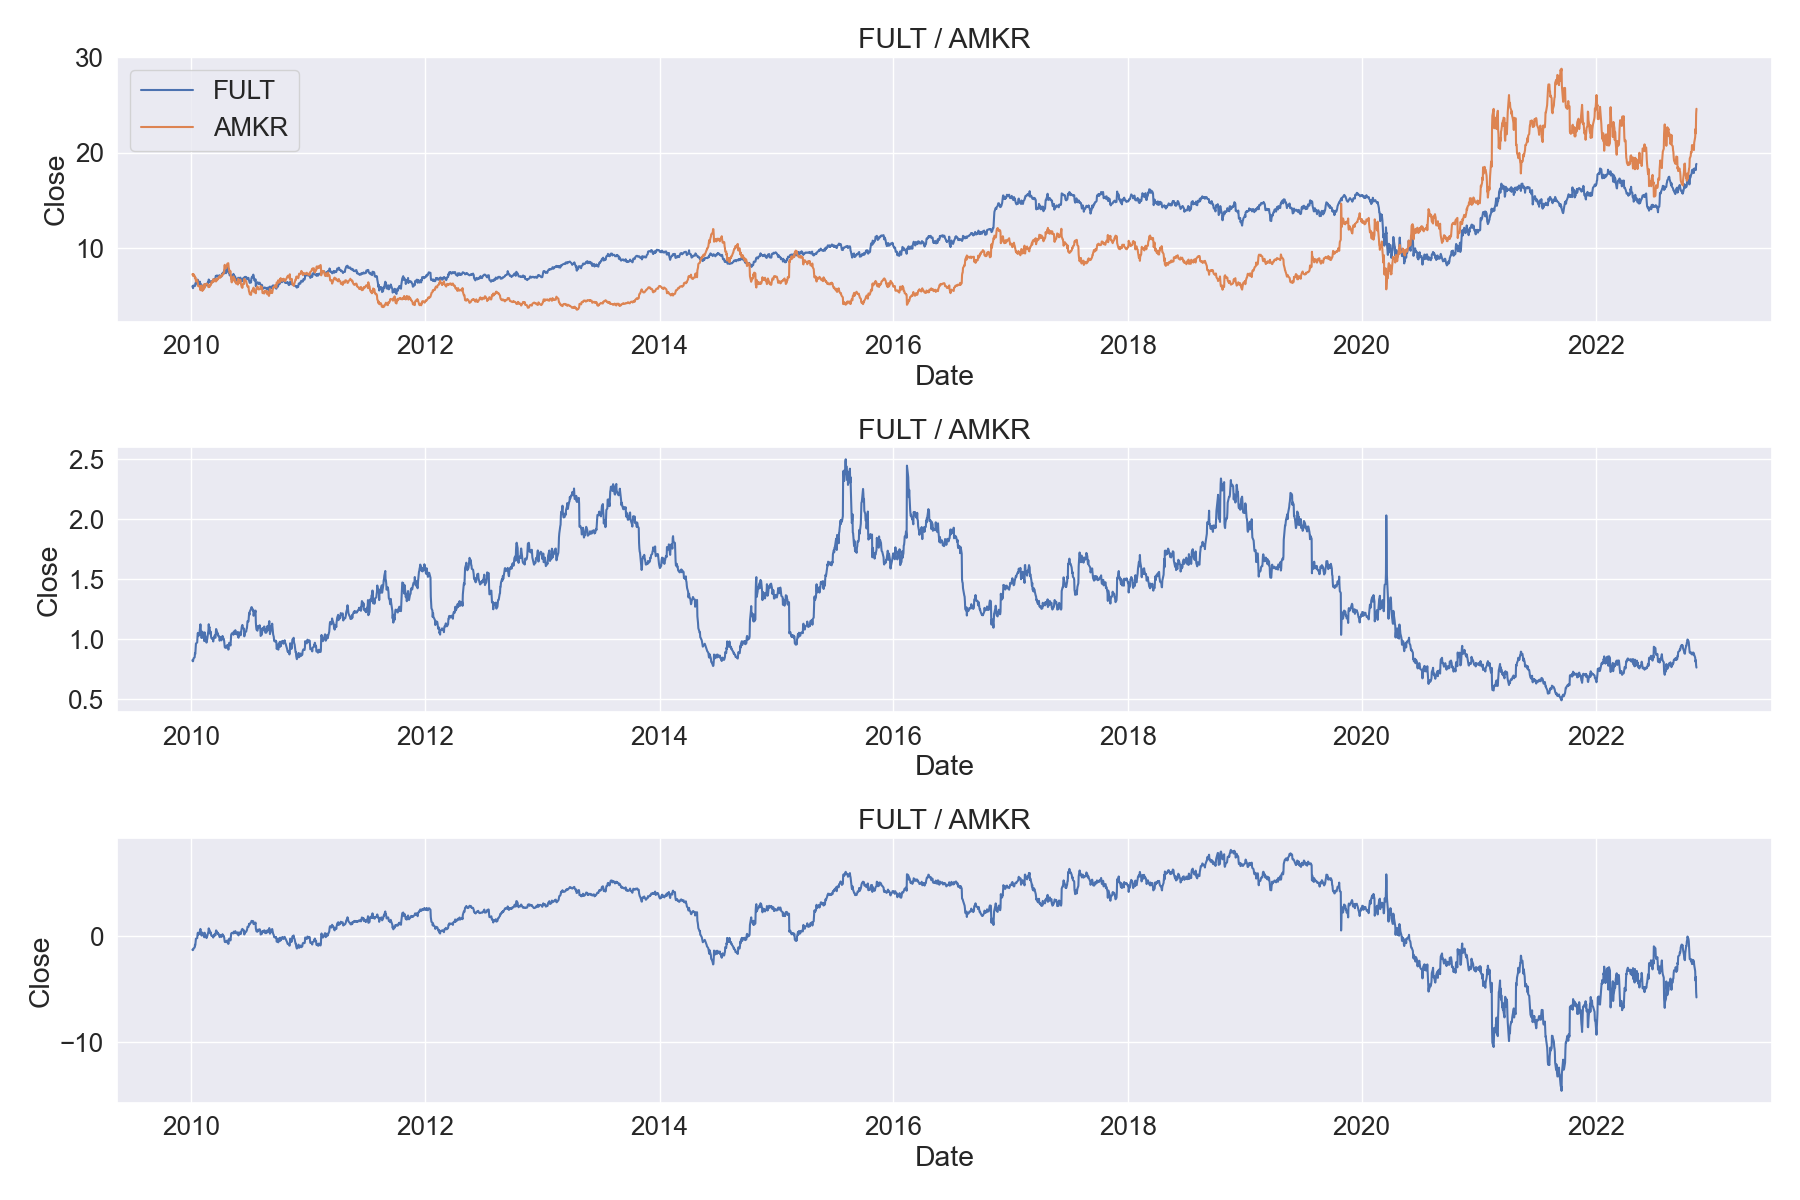

In [8]:
pair("FULT", "AMKR", "LONG position FULT P/E ratio=11.22, dividend: 0.03, Gross Profit: 935988",
     "SHORT position AMKR P/E ratio = 7.11, dividend: 0.01, Gross profit: 1225554");

Long BETA: 0.79
Short BETA: 1.55
LONG position FULT P/E ratio=11.22, dividend: 0.03, Gross Profit: 935988
SHORT position EXTR P/E ratio = 46.14, dividend: None, Gross profit: 629938


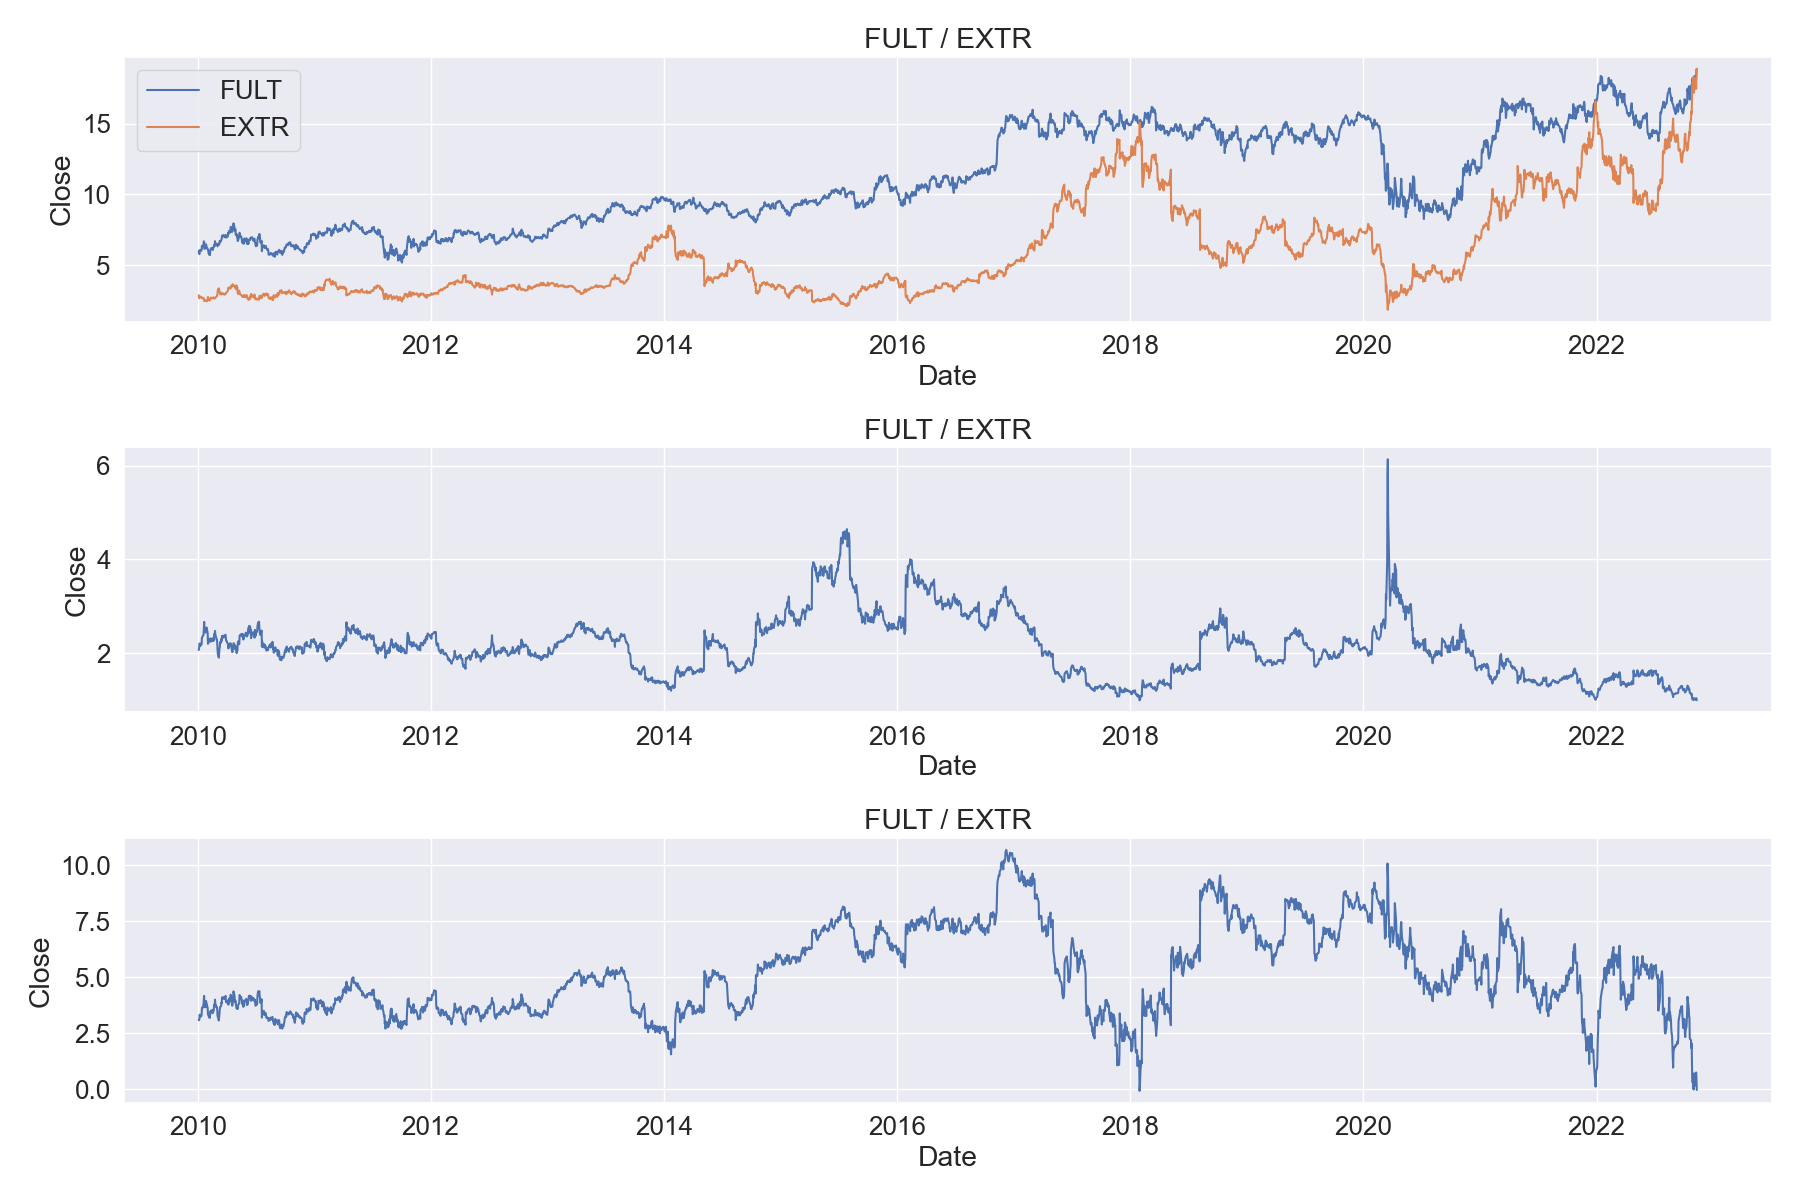

In [9]:
pair("FULT", "EXTR", "LONG position FULT P/E ratio=11.22, dividend: 0.03, Gross Profit: 935988",
     "SHORT position EXTR P/E ratio = 46.14, dividend: None, Gross profit: 629938");

Long BETA: 0.69
Short BETA: 0.79
LONG position ARCC P/E ratio=11.45, dividend: 0.09, Gross profit: 1820000
SHORT position FULT P/E ratio=11.22, dividend: 0.034, Gross Profit: 935988


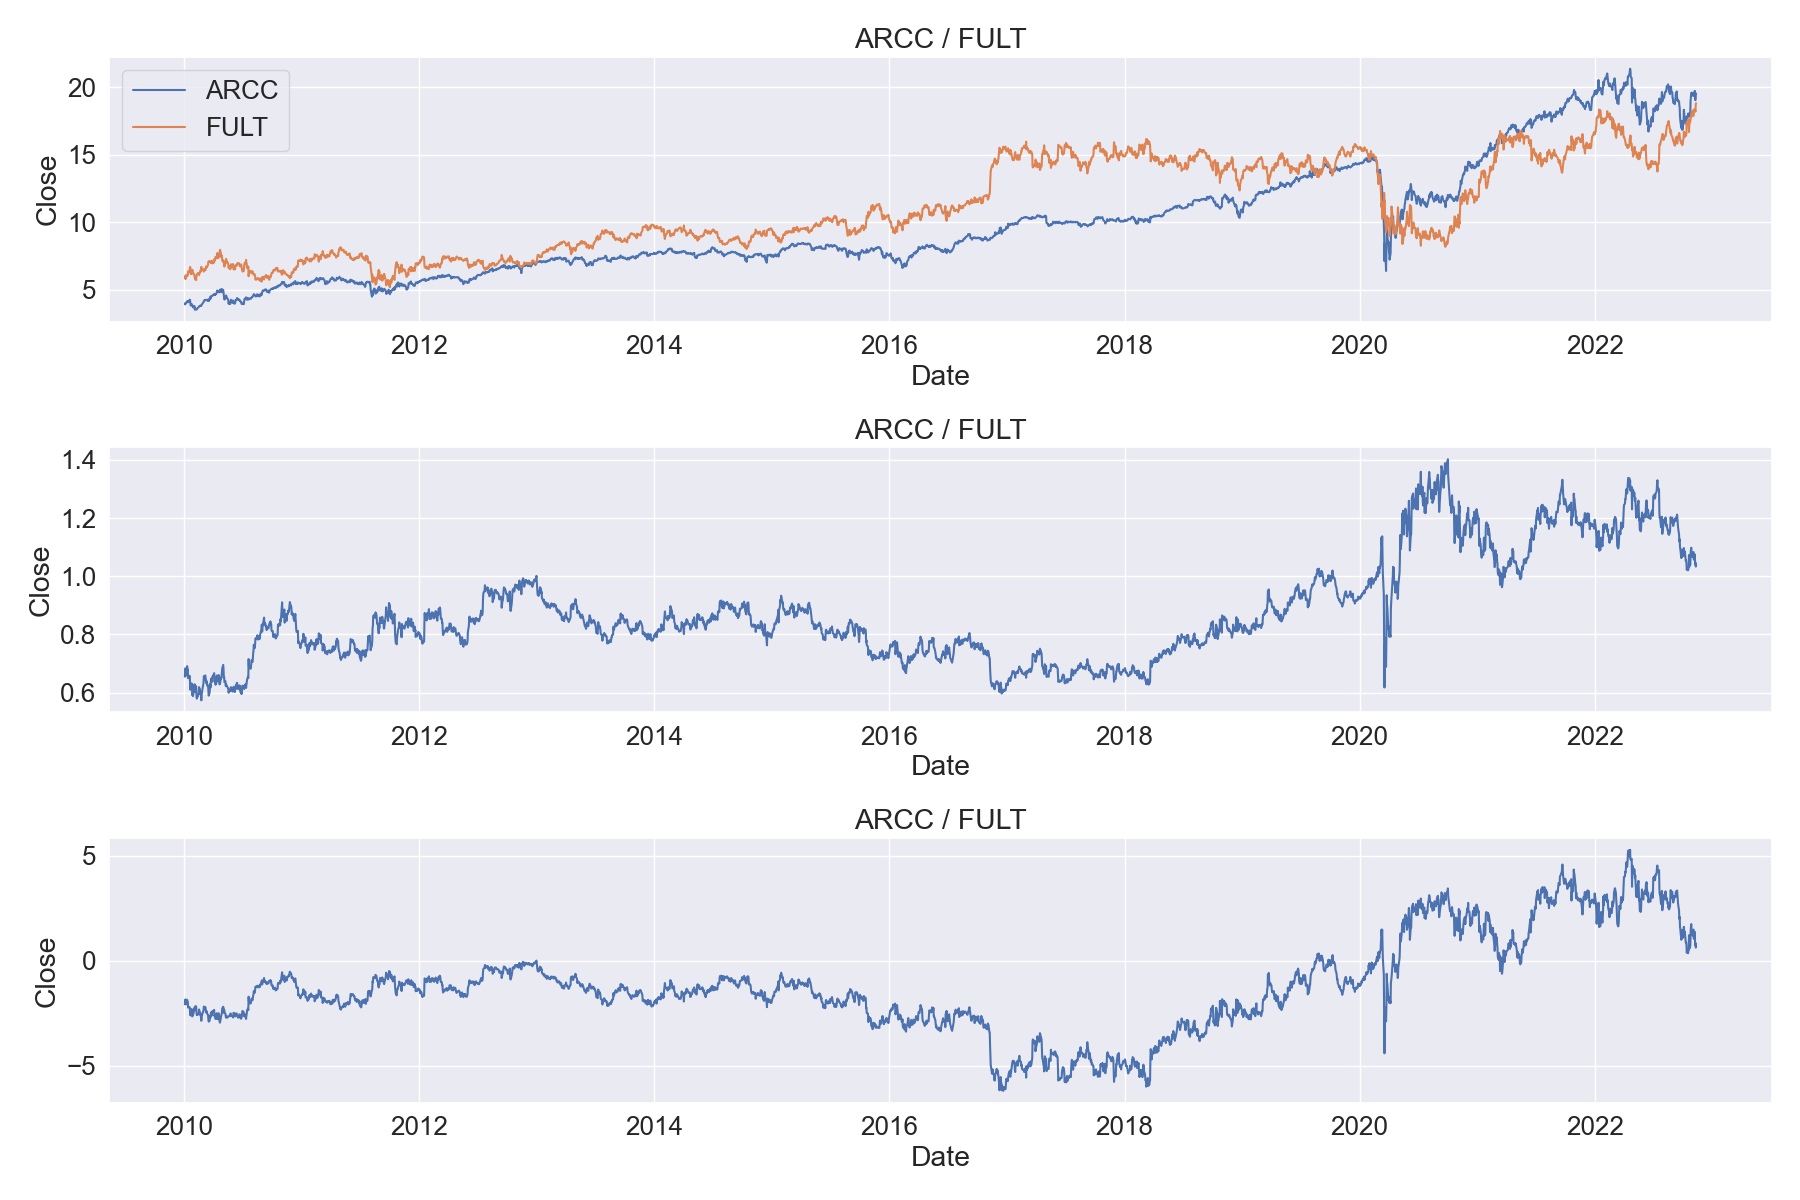

In [11]:
pair("ARCC", "FULT", "LONG position ARCC P/E ratio=11.45, dividend: 0.09, Gross profit: 1820000",
     "SHORT position FULT P/E ratio=11.22, dividend: 0.034, Gross Profit: 935988");

Long BETA: 0.42
Short BETA: 1.15
LONG position GBDC P/E ratio=10.22, dividend: 0.093, Gross Profit: 307125
SHORT position ARI P/E ratio=5.87, dividend: 0.124, Gross profit: 299360


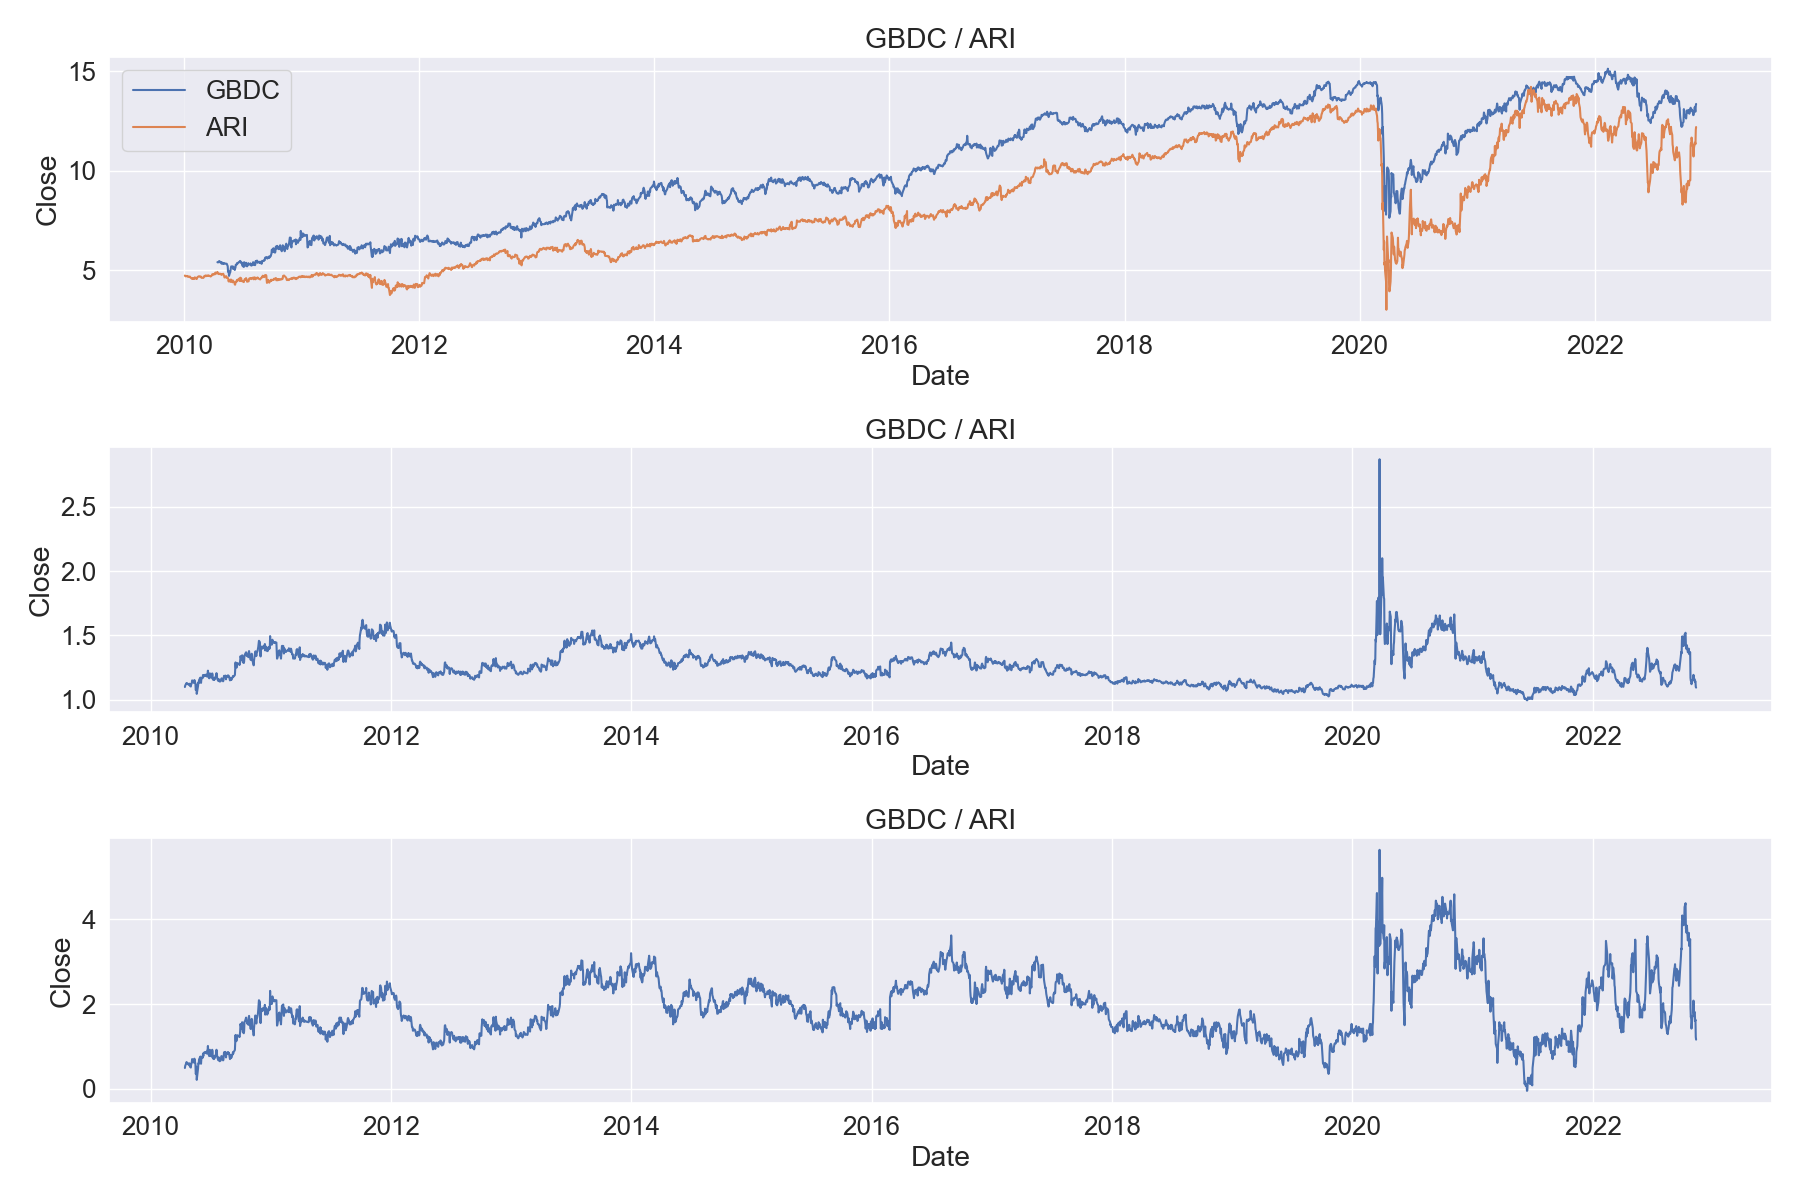

In [12]:
pair("GBDC", "ARI", "LONG position GBDC P/E ratio=10.22, dividend: 0.093, Gross Profit: 307125",
     "SHORT position ARI P/E ratio=5.87, dividend: 0.124, Gross profit: 299360");

Long BETA: 1.74
Short BETA: 1.1
LONG position GT P/E ratio=3.3, dividend: None, Gross Profit: 3787000
SHORT position ADEA P/E ratio = None, dividend: 0.018, Gross profit: 750938


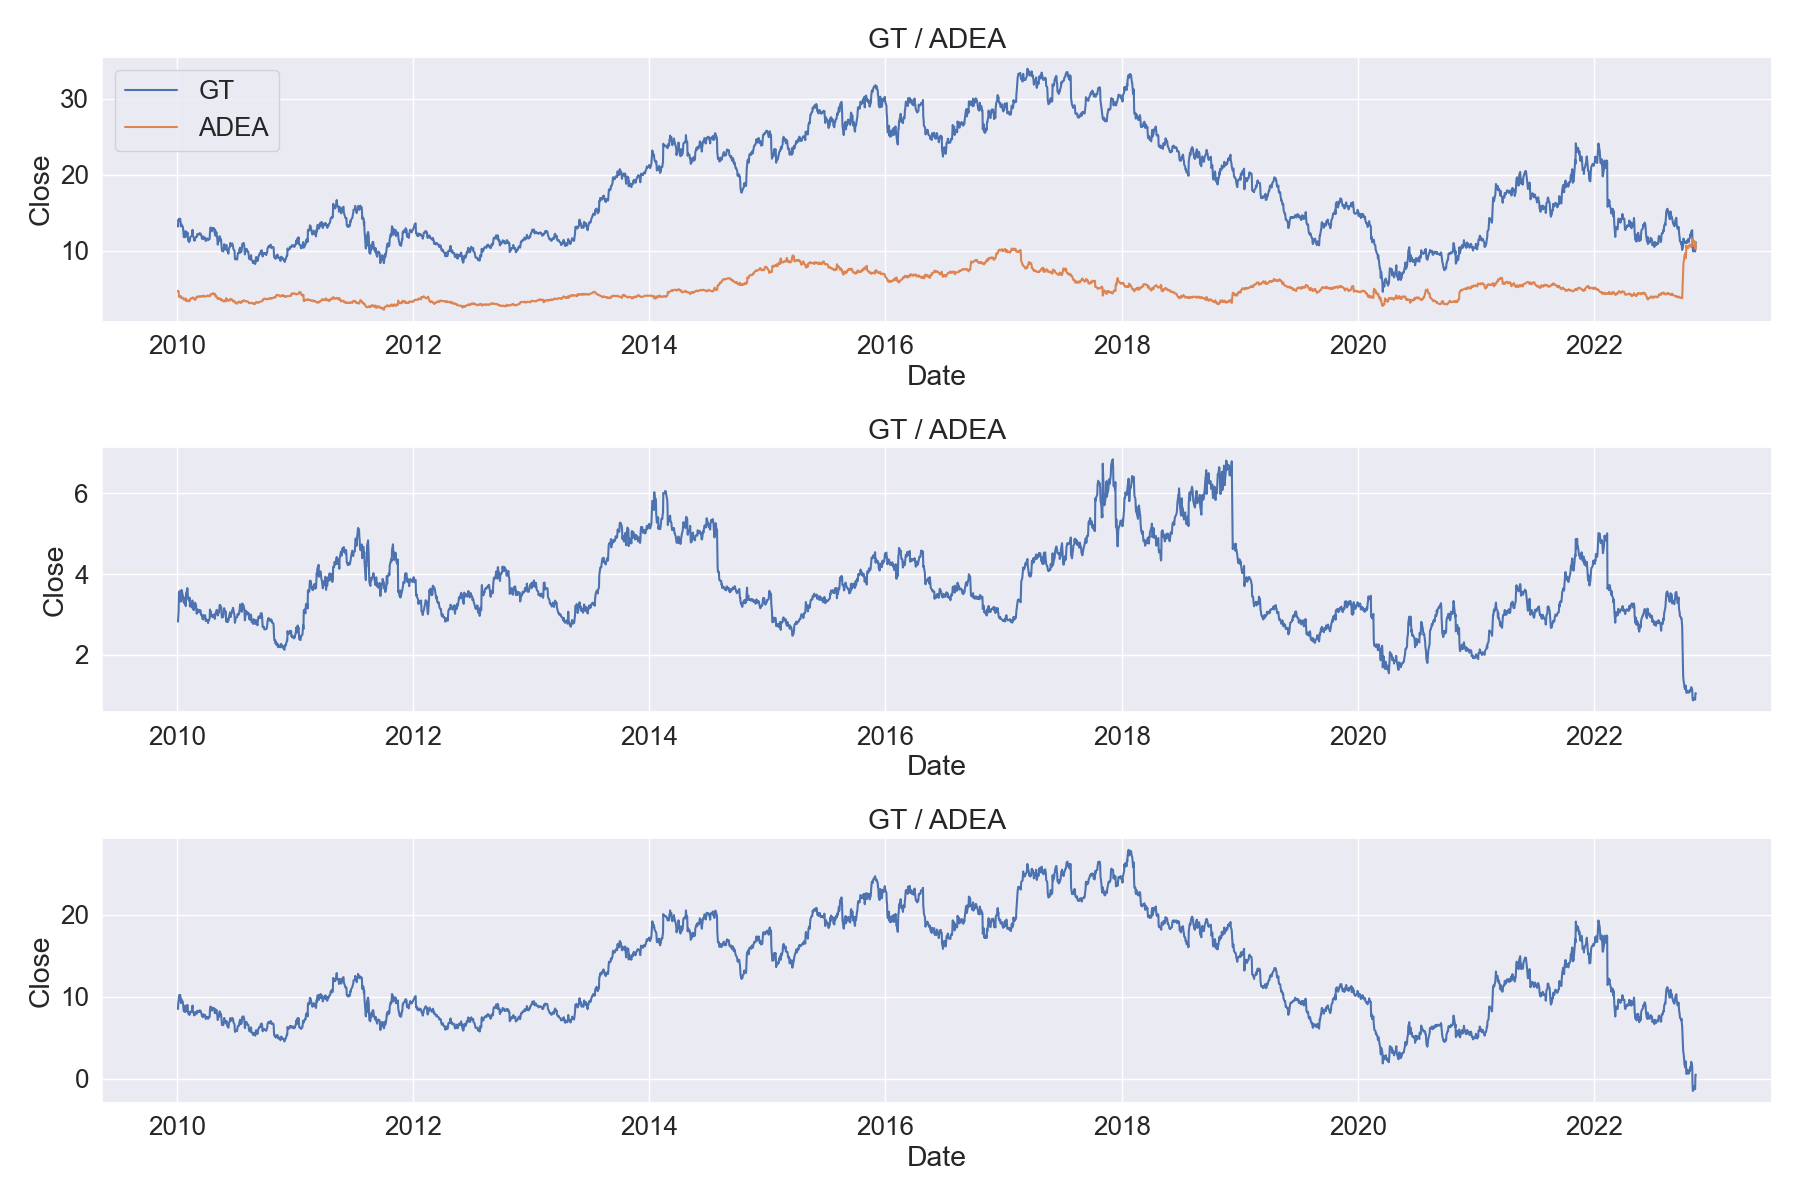

In [13]:
pair("GT", "ADEA", "LONG position GT P/E ratio=3.3, dividend: None, Gross Profit: 3787000",
     "SHORT position ADEA P/E ratio = None, dividend: 0.018, Gross profit: 750938");

Long BETA: 1.06
Short BETA: 0.9
LONG position CPRX P/E ratio=26.94, dividend: None, Gross profit: 102013
SHORT position GTN P/E ratio=11.69, dividend: 0.02, Gross Profit: 806000


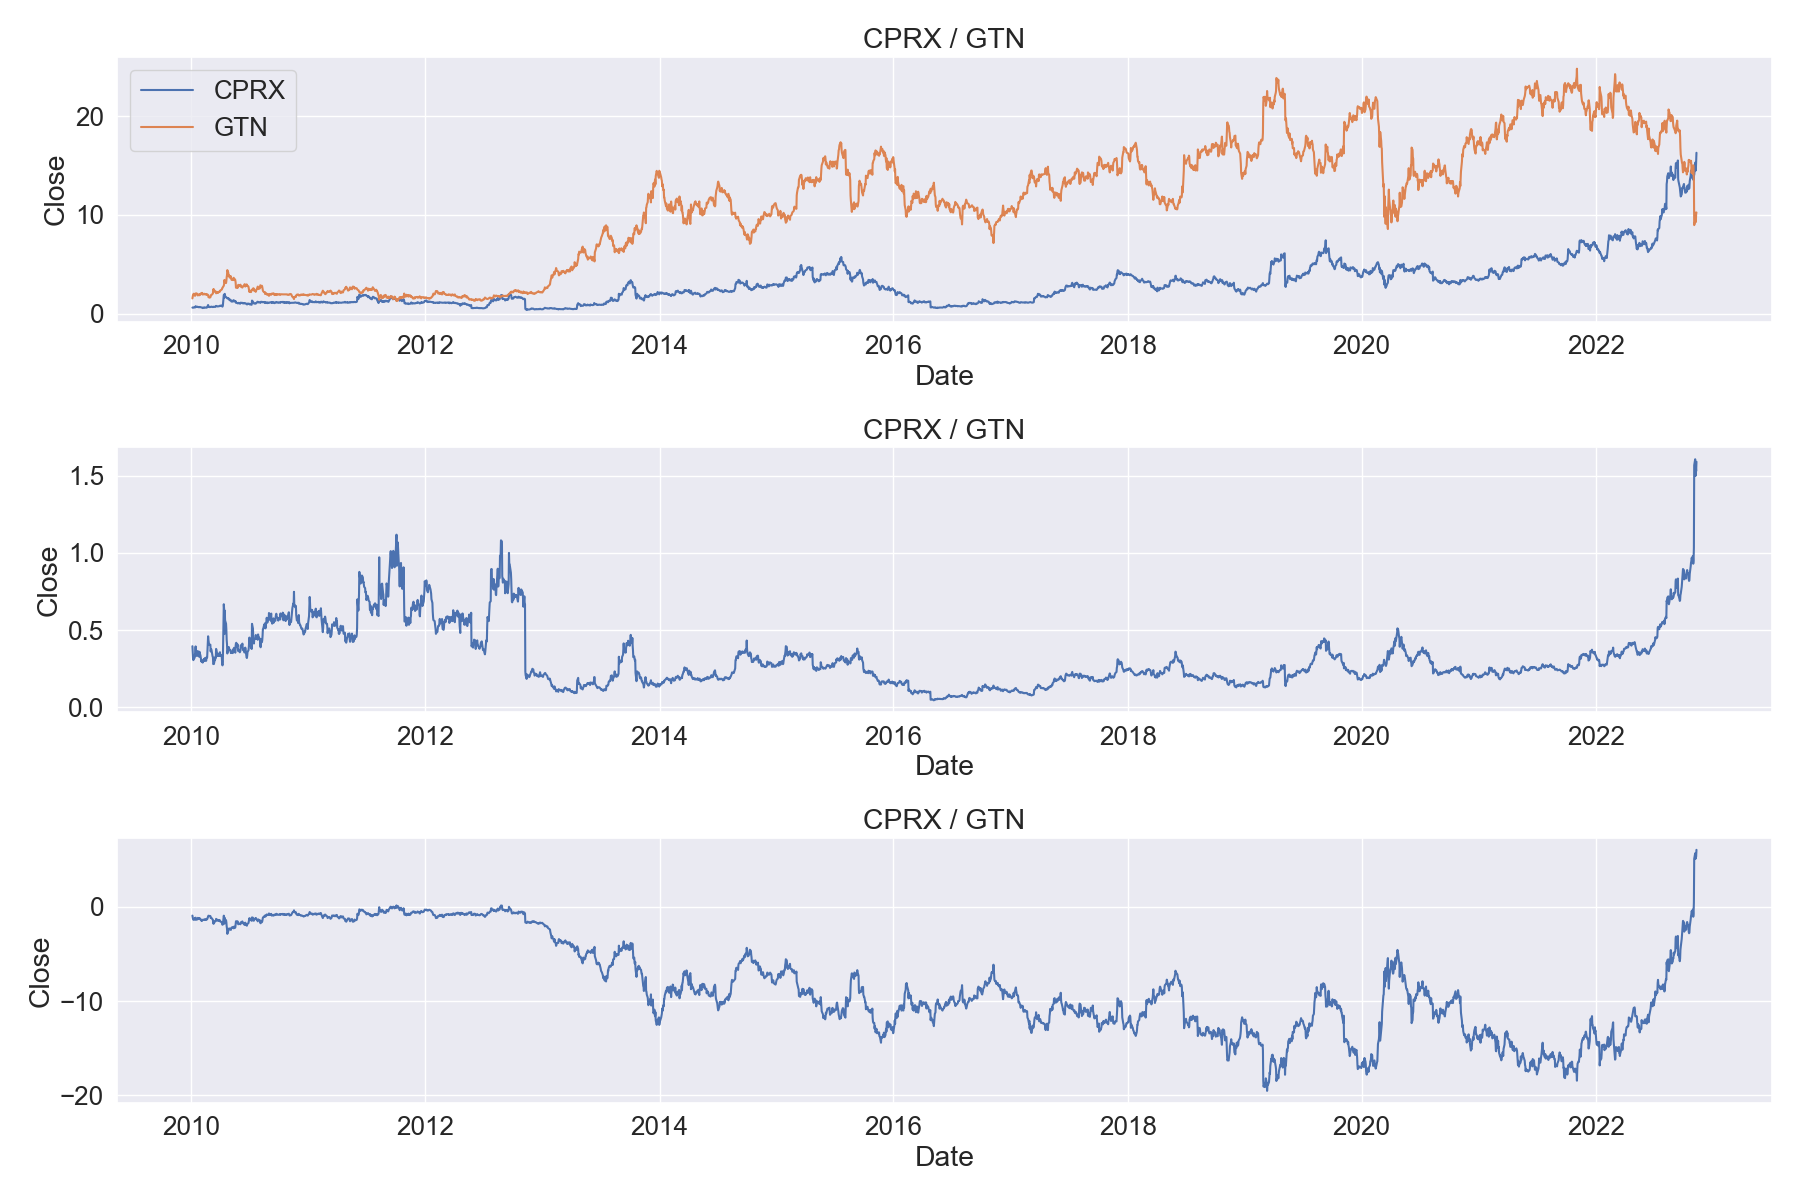

In [14]:
pair("CPRX", "GTN", "LONG position CPRX P/E ratio=26.94, dividend: None, Gross profit: 102013",
     "SHORT position GTN P/E ratio=11.69, dividend: 0.02, Gross Profit: 806000");

Long BETA: 0.92
Short BETA: 1.54
LONG position FNB P/E ratio = 12.53, dividend: 0.034, Gross profit: 1233400
SHORT position HA P/E ratio=None, dividend: None, Gross Profit: -386787


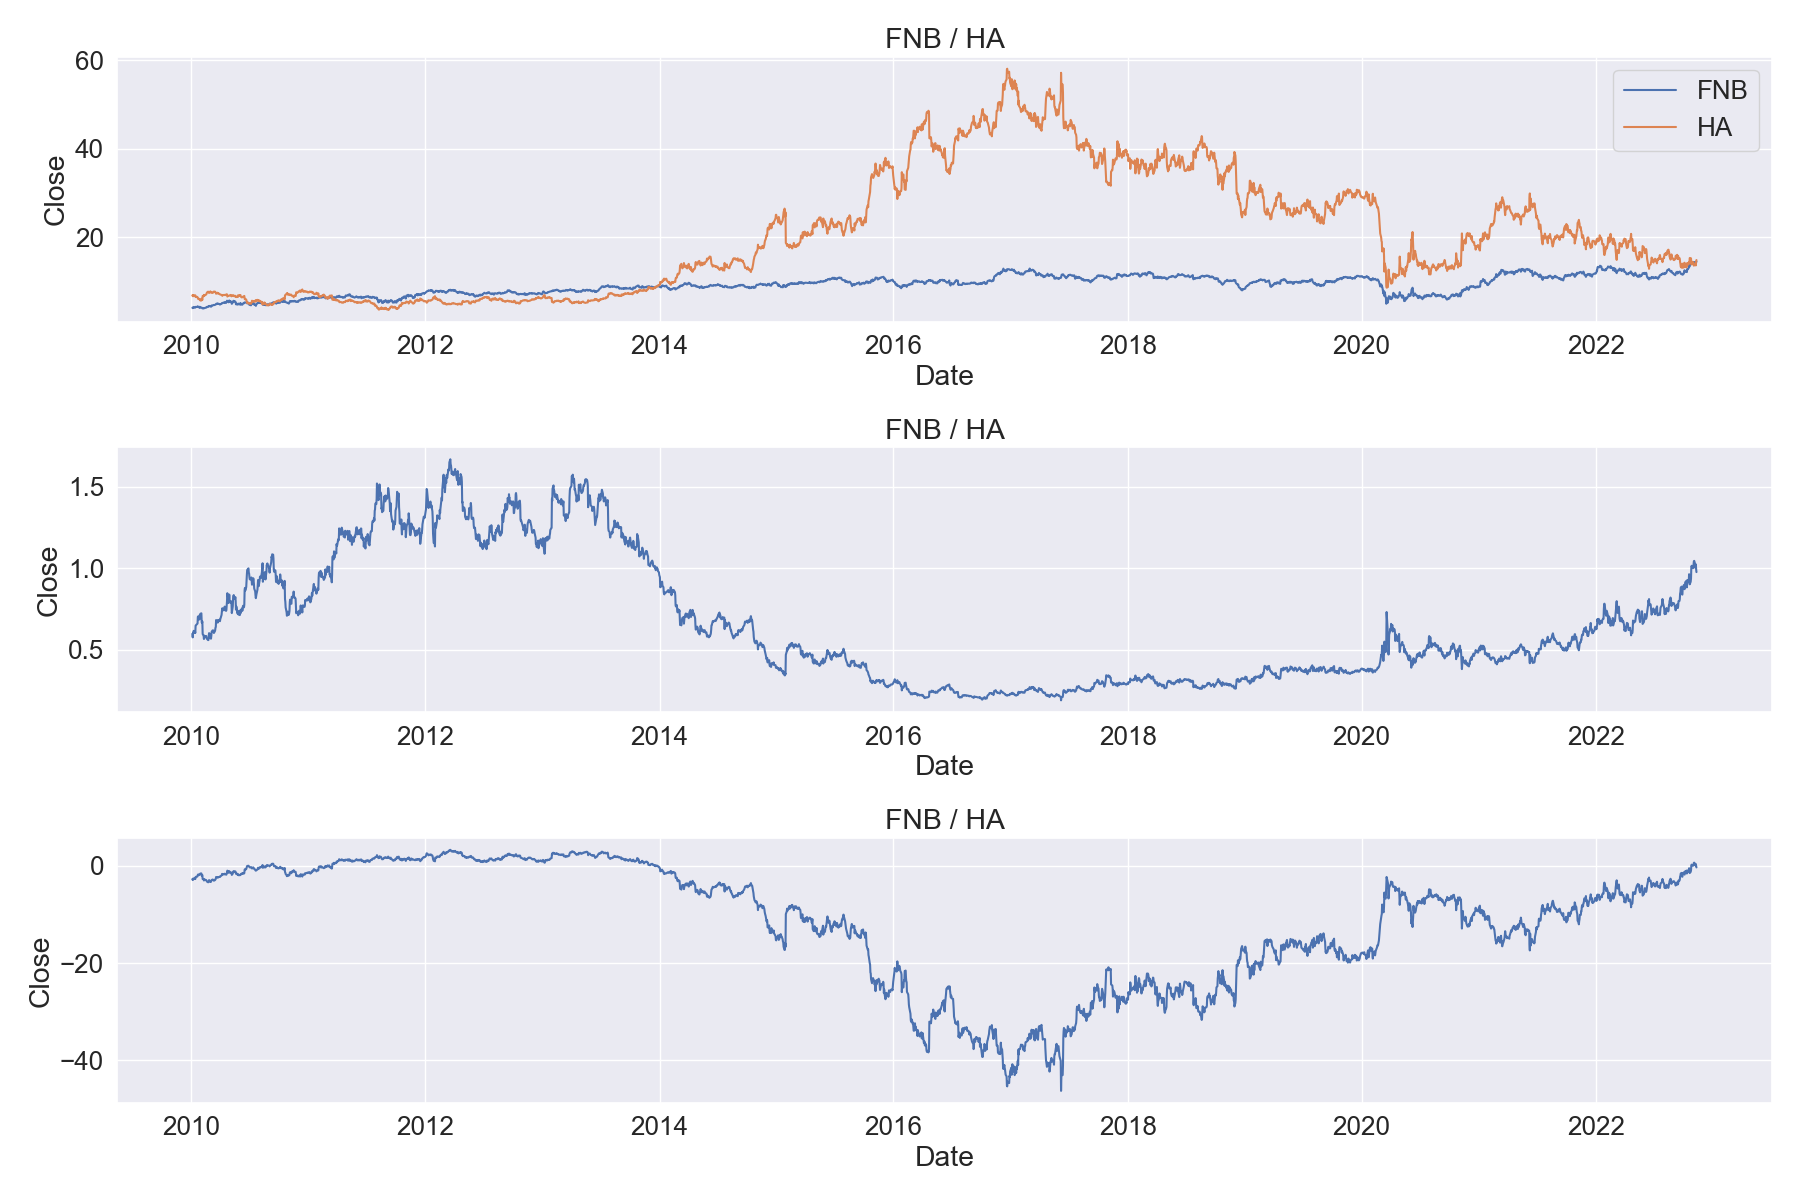

In [15]:
pair("FNB", "HA", "LONG position FNB P/E ratio = 12.53, dividend: 0.034, Gross profit: 1233400",
     "SHORT position HA P/E ratio=None, dividend: None, Gross Profit: -386787");

Long BETA: 1.02
Short BETA: 1.12
LONG position AKR P/E ratio=40, dividend: 0.05, Gross profit: 199647
SHORT position HBI P/E ratio=5.75, dividend: 0.08, Gross Profit: 2661797


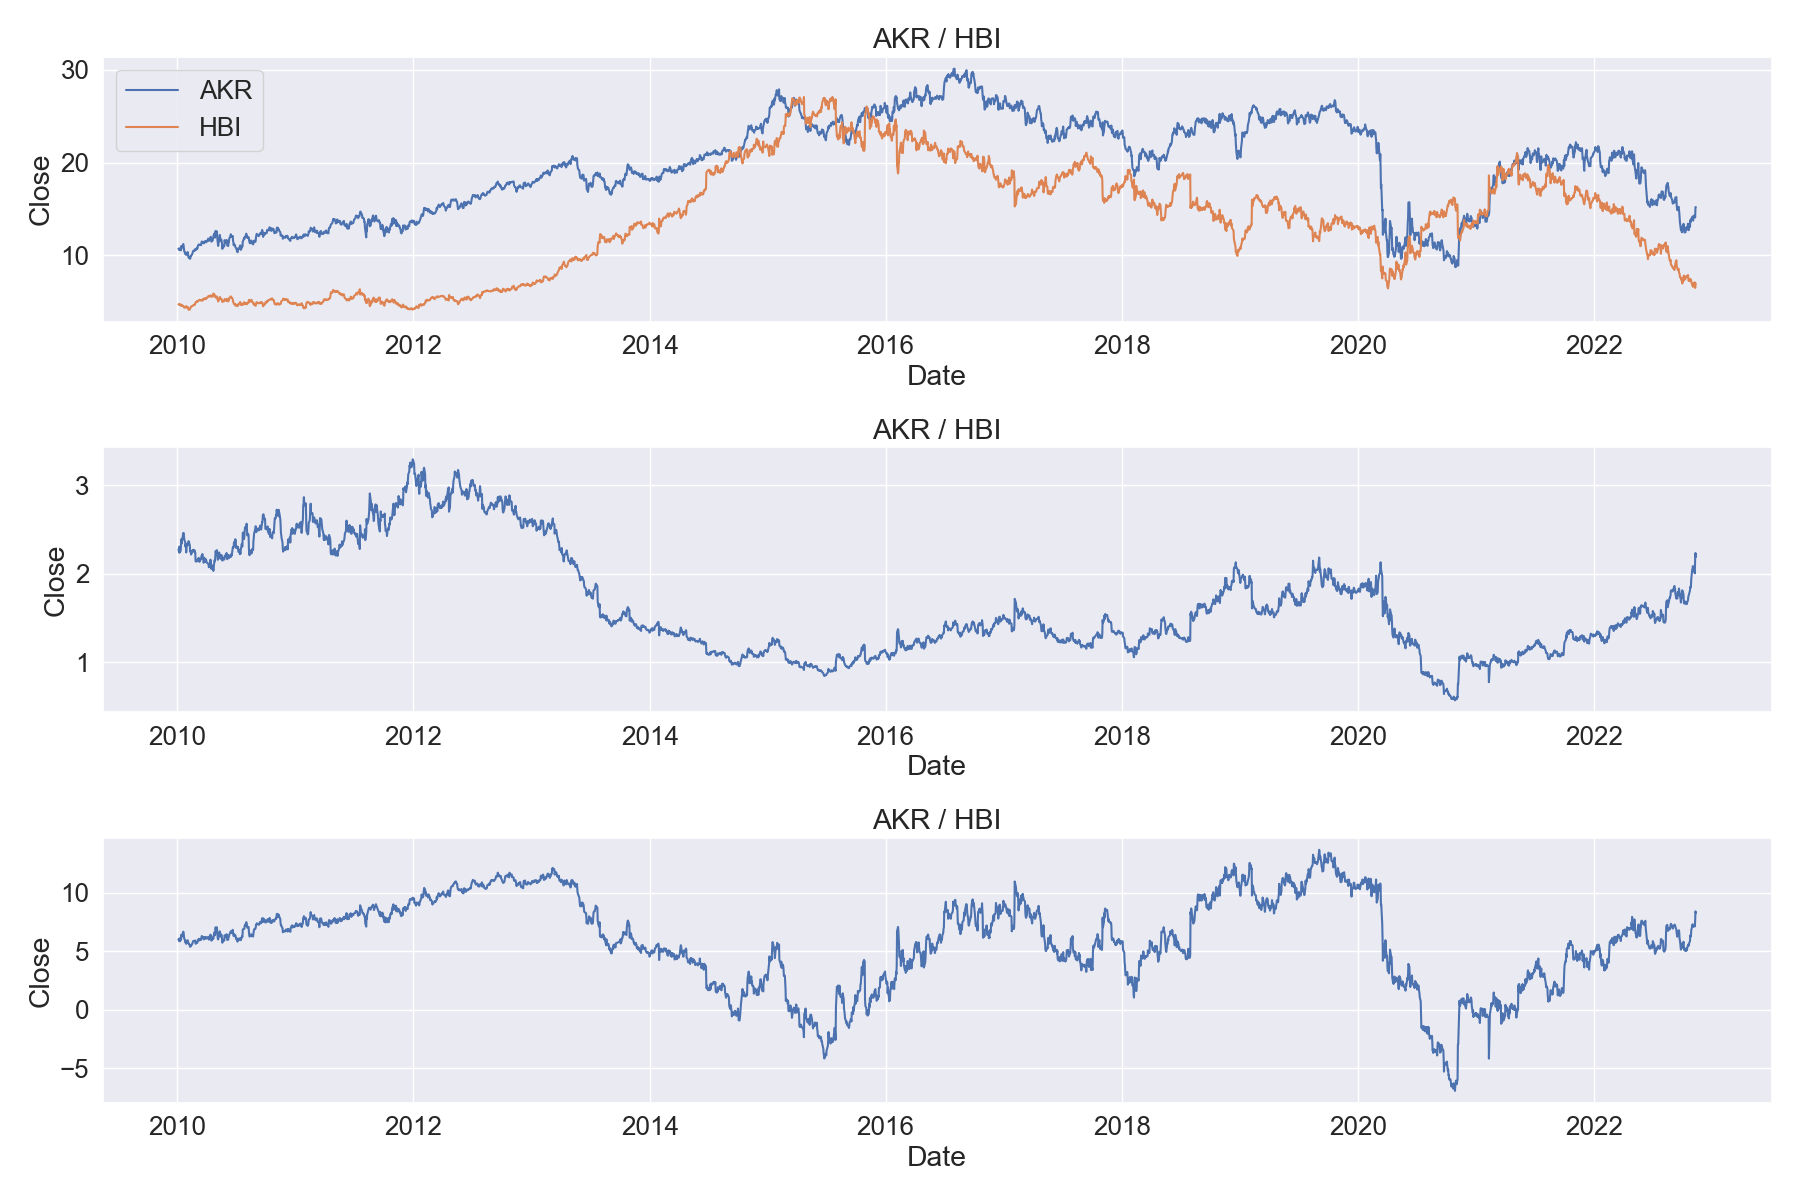

In [16]:
pair("AKR", "HBI", "LONG position AKR P/E ratio=40, dividend: 0.05, Gross profit: 199647",
     "SHORT position HBI P/E ratio=5.75, dividend: 0.08, Gross Profit: 2661797");

Long BETA: 0.8
Short BETA: 1.12
LONG position ET P/E ratio=9.82, dividend: 0.076, Gross profit: 13585000
SHORT position HBI P/E ratio=5.75, dividend: 0.08, Gross Profit: 2661797


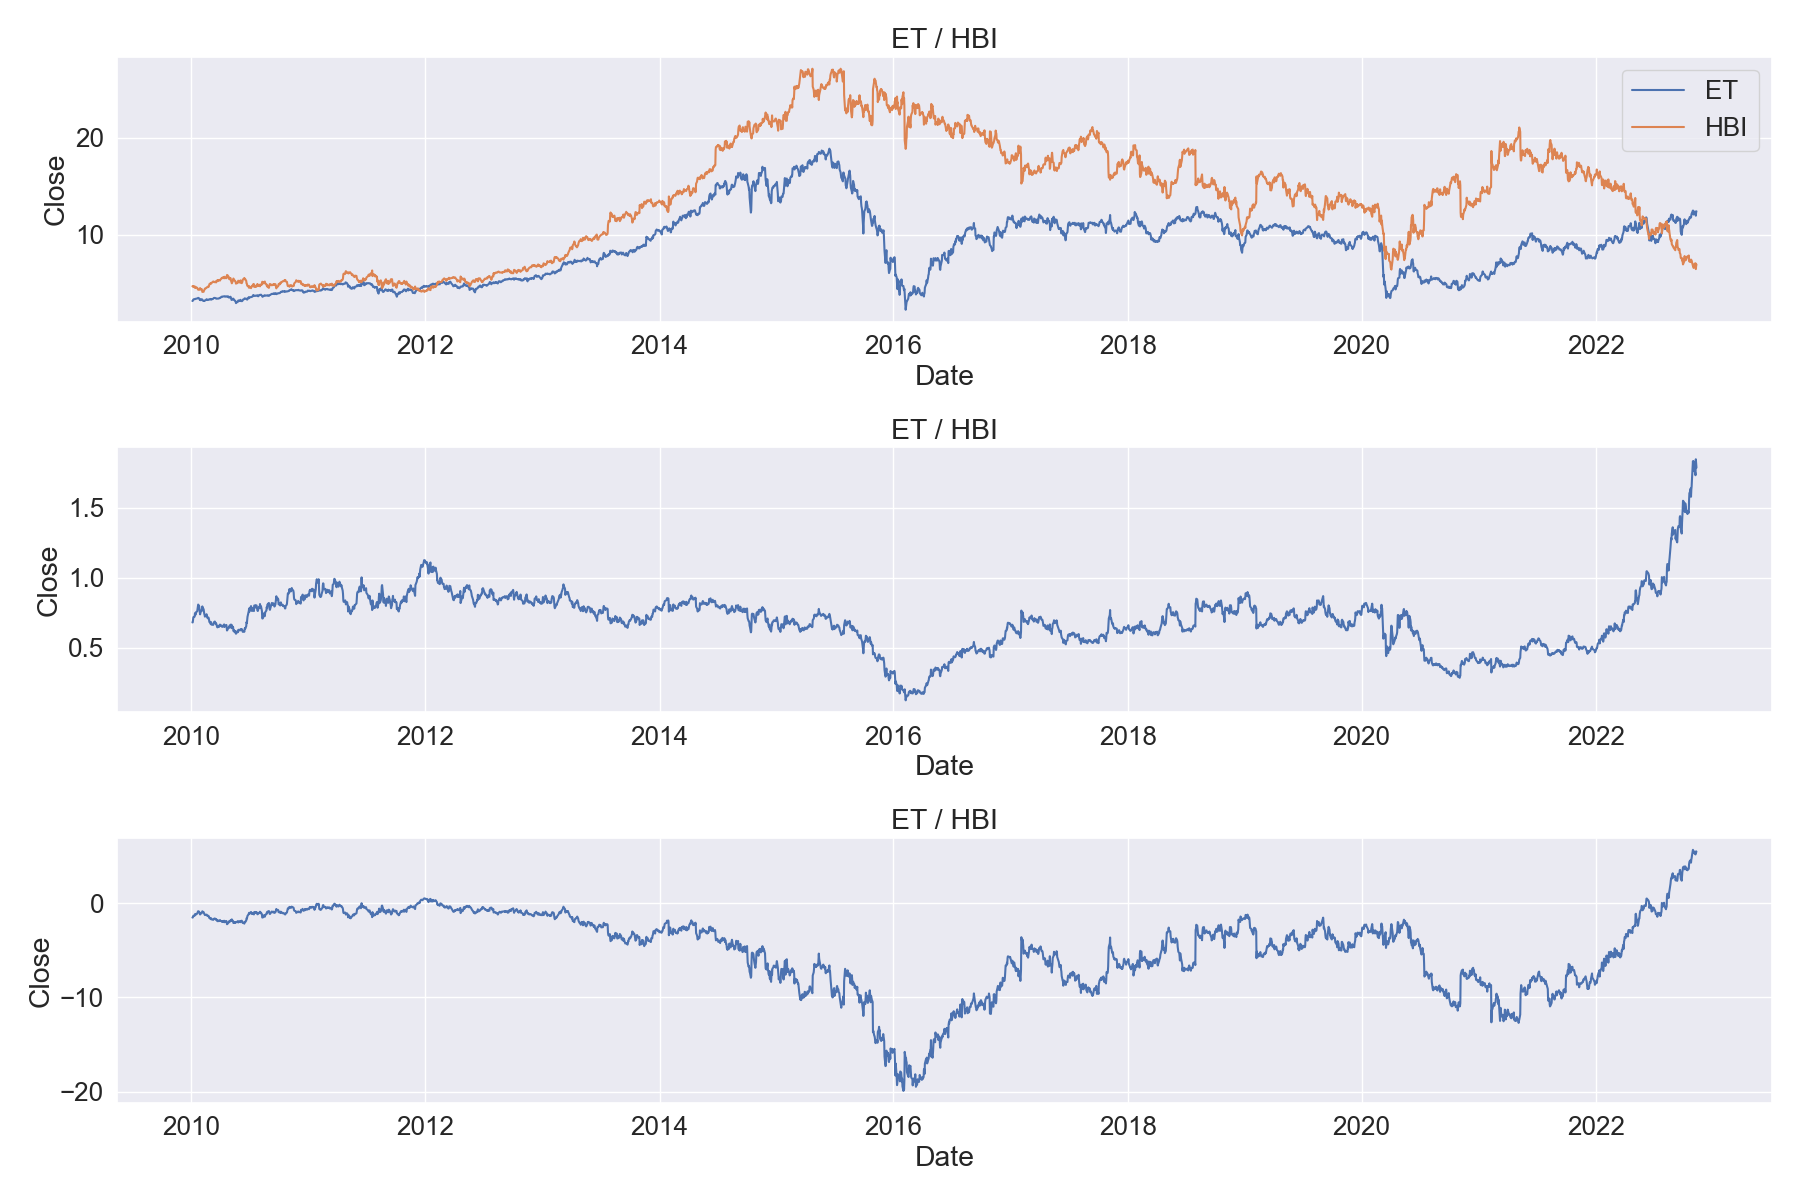

In [17]:
pair("ET", "HBI", "LONG position ET P/E ratio=9.82, dividend: 0.076, Gross profit: 13585000",
     "SHORT position HBI P/E ratio=5.75, dividend: 0.08, Gross Profit: 2661797");

Long BETA: 0.78
Short BETA: 0.87
LONG position HCSG P/E ratio=48.32, dividend: 0.064, Gross Profit: 226877
SHORT position DEI P/E ratio = 35.3, dividend: 0.067, Gross profit: 611142


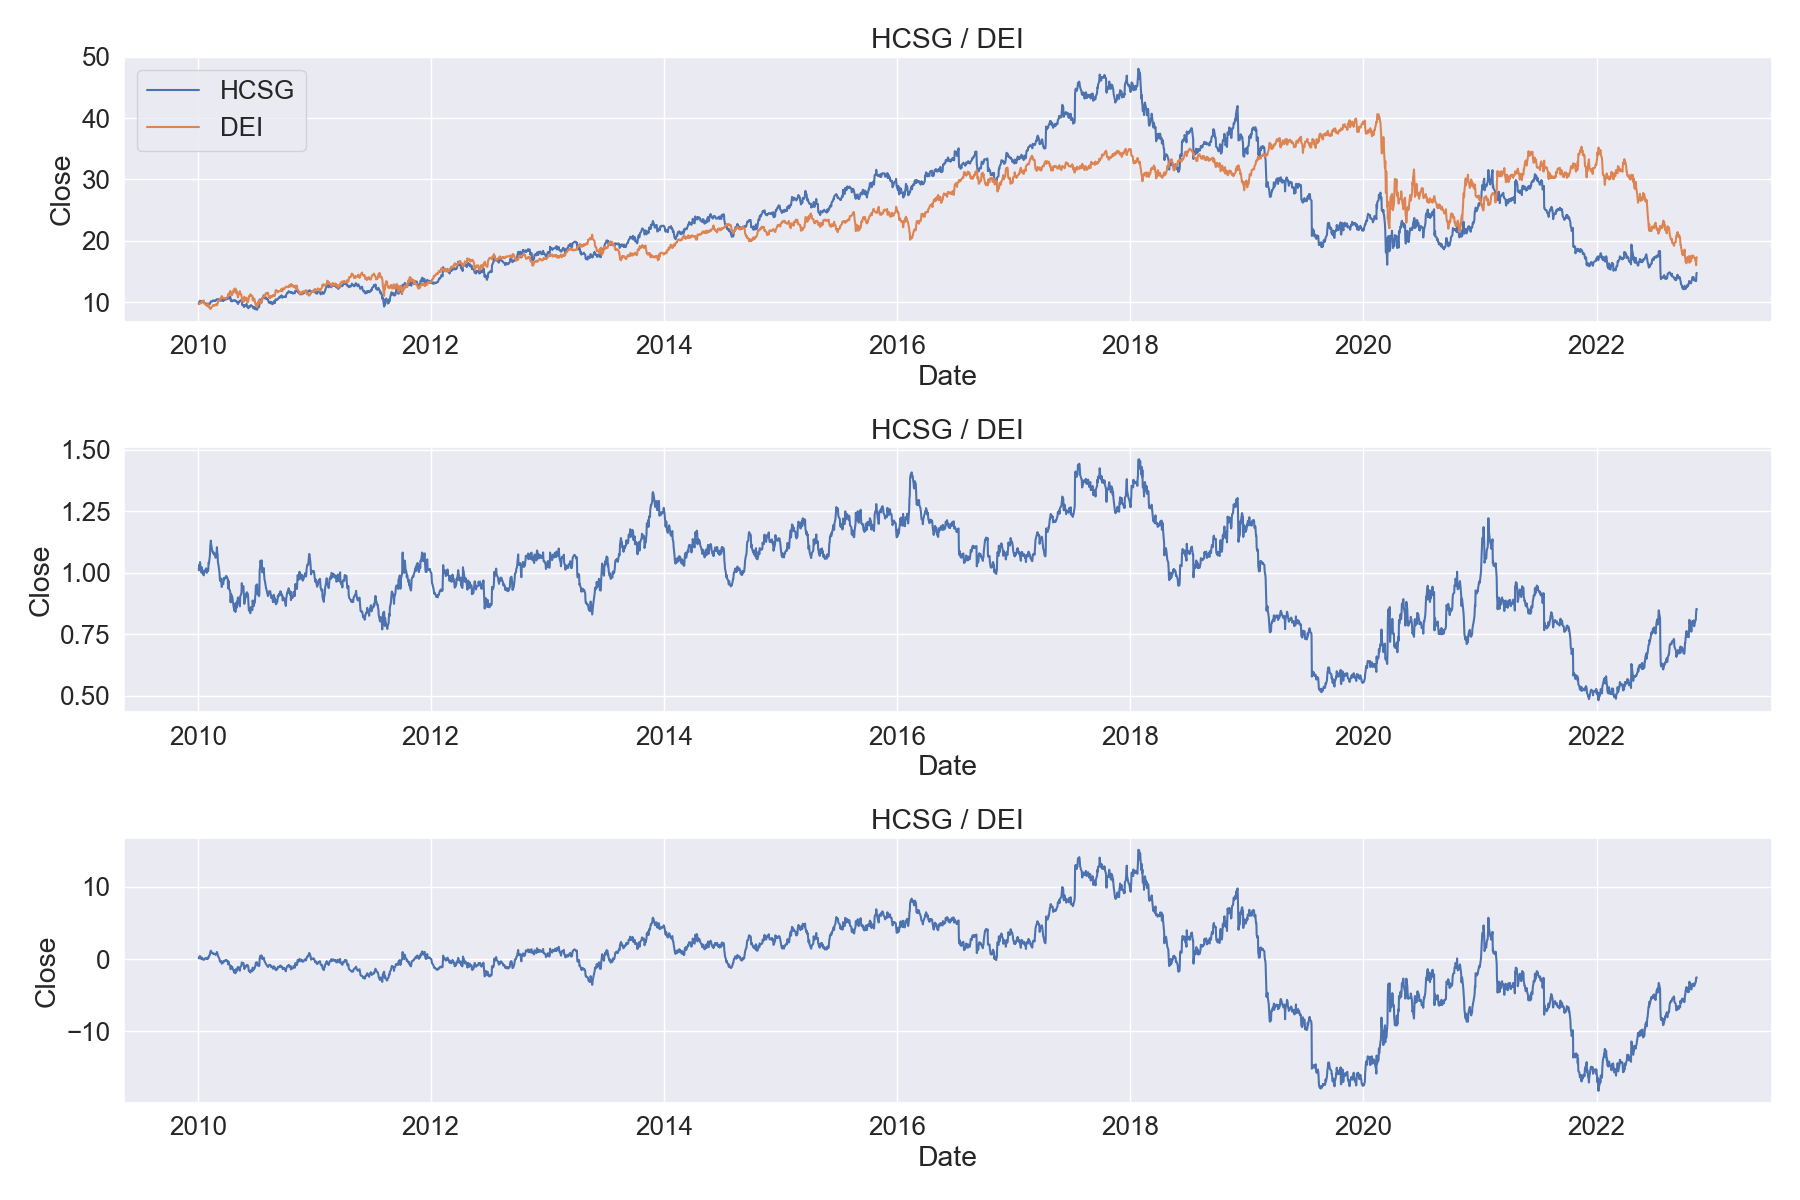

In [18]:
pair("HCSG", "DEI", "LONG position HCSG P/E ratio=48.32, dividend: 0.064, Gross Profit: 226877",
     "SHORT position DEI P/E ratio = 35.3, dividend: 0.067, Gross profit: 611142");

Long BETA: 1.07
Short BETA: 1.48
LONG position HLIT P/E ratio=46.63, dividend: None, Gross Profit: 260313
SHORT position CDMO P/E ratio=9.01, dividend: None, Gross profit: 36648


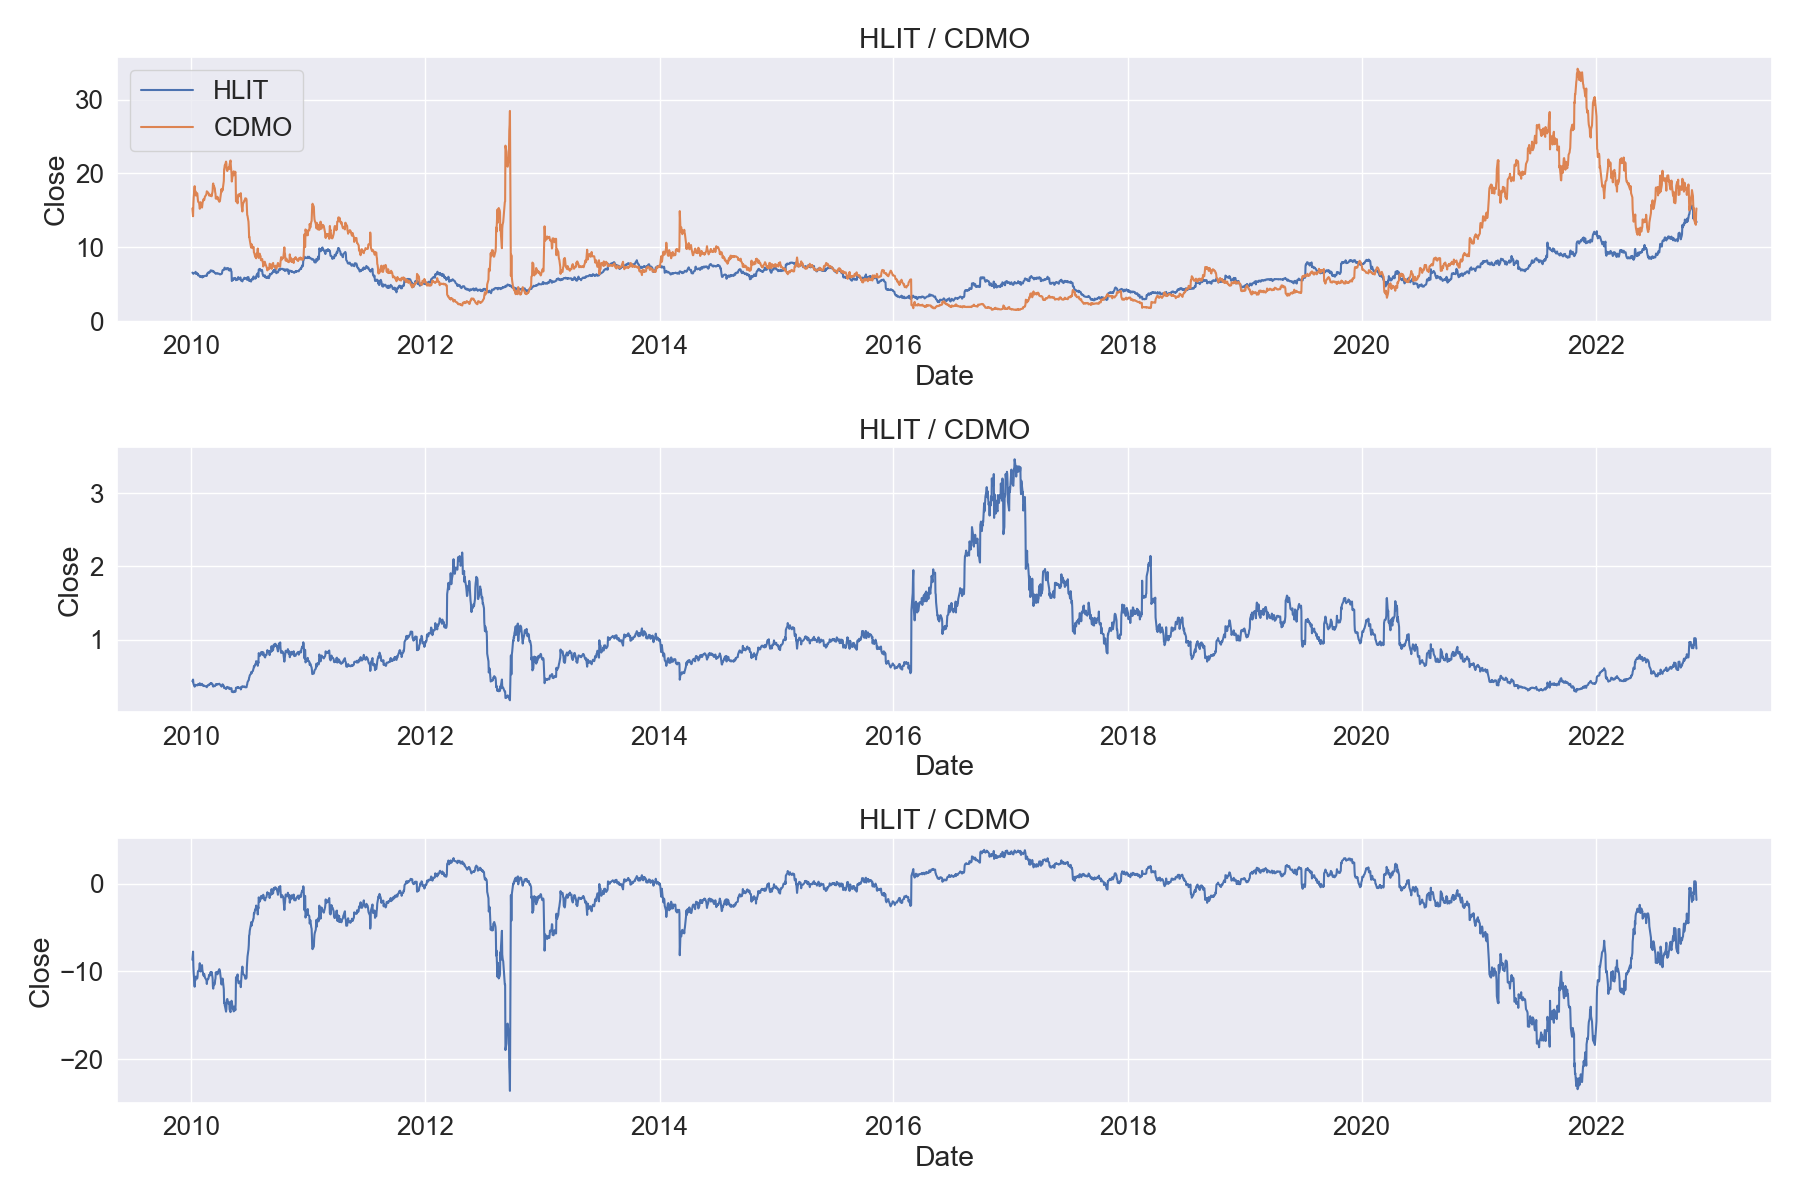

In [19]:
pair("HLIT", "CDMO", "LONG position HLIT P/E ratio=46.63, dividend: None, Gross Profit: 260313",
     "SHORT position CDMO P/E ratio=9.01, dividend: None, Gross profit: 36648");

Long BETA: 1.12
Short BETA: 1.59
LONG position ENLC P/E ratio=31.1, dividend: 0.039, Gross profit: 1655100
SHORT position HOUS P/E ratio=3.13, dividend: None, Gross Profit: 3230000


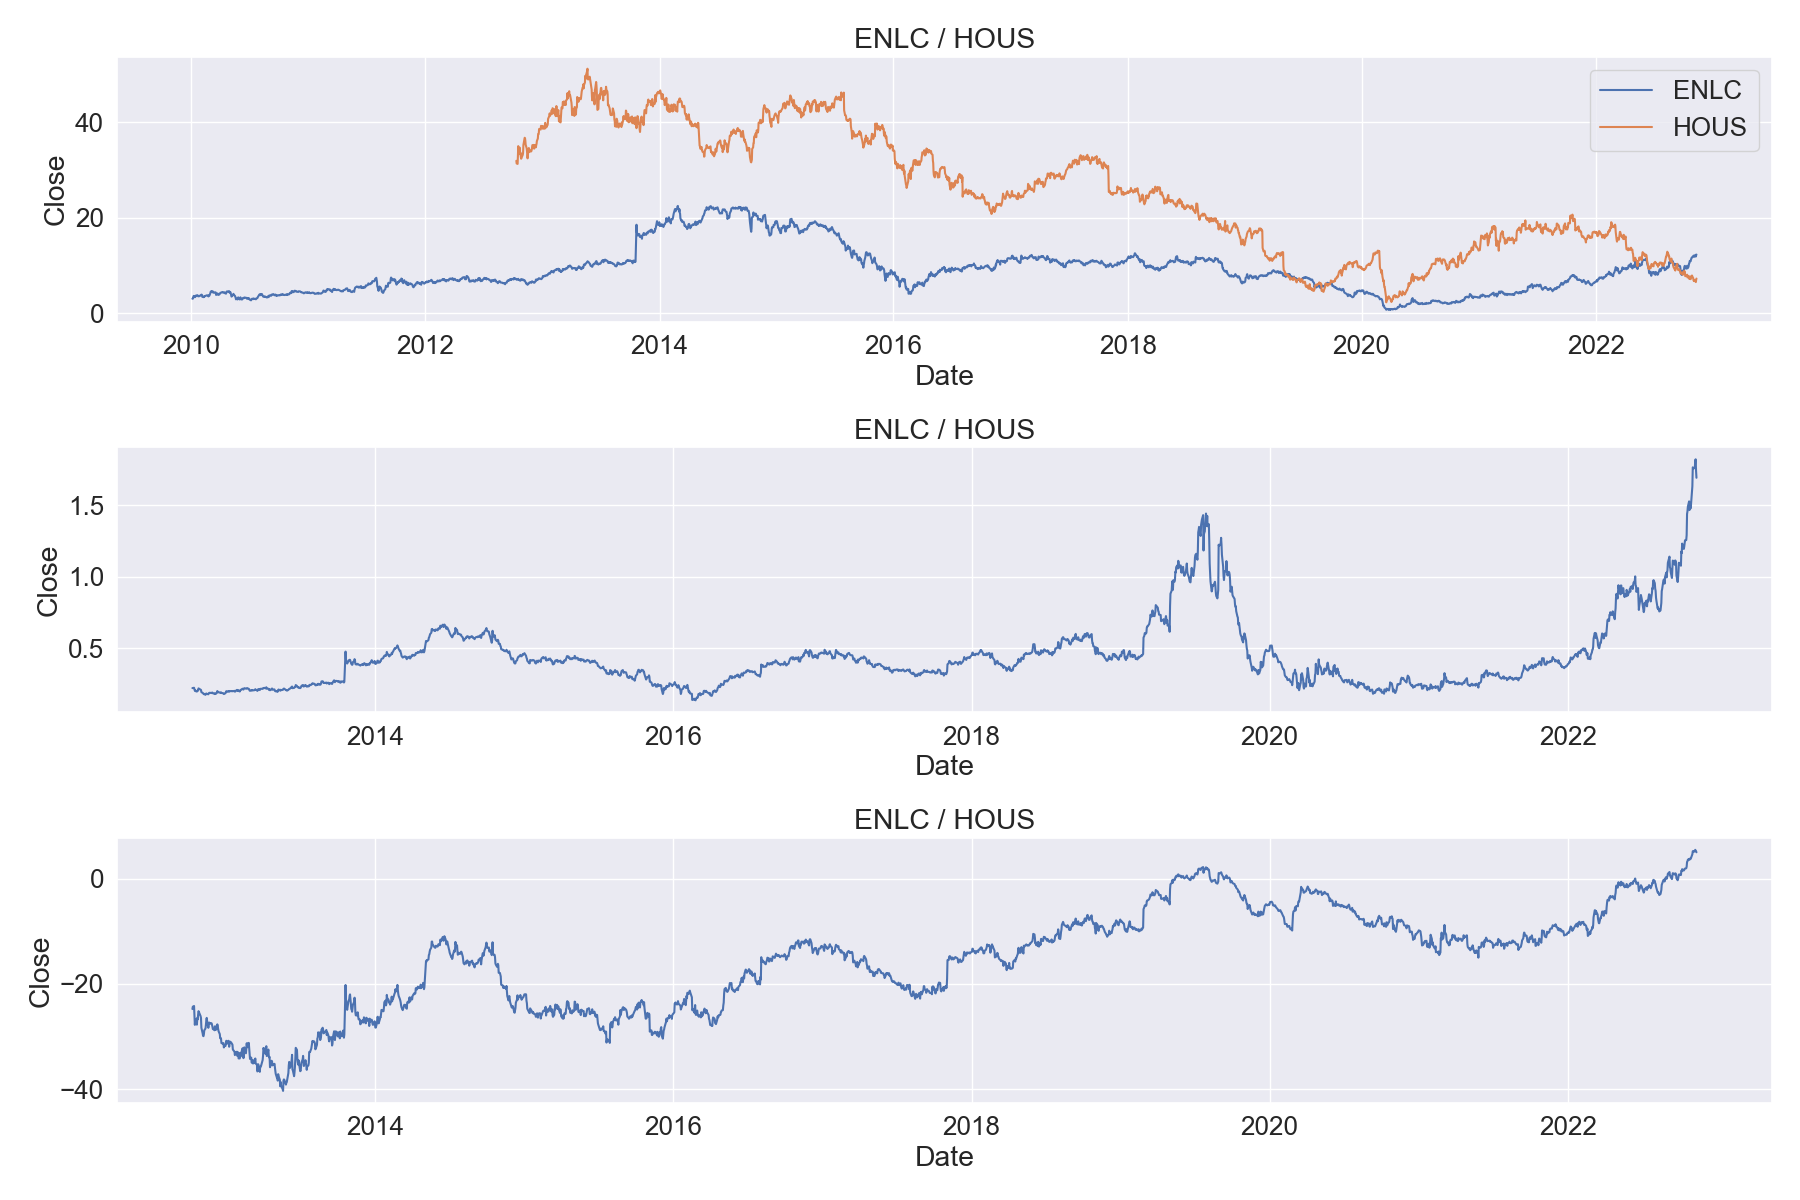

In [20]:
pair("ENLC", "HOUS", "LONG position ENLC P/E ratio=31.1, dividend: 0.039, Gross profit: 1655100",
     "SHORT position HOUS P/E ratio=3.13, dividend: None, Gross Profit: 3230000");

Long BETA: 1.18
Short BETA: 1.59
LONG position ESTE P/E ratio=6.57, dividend: None, Gross profit: 343913
SHORT position HOUS P/E ratio=3.13, dividend: None, Gross Profit: 3230000


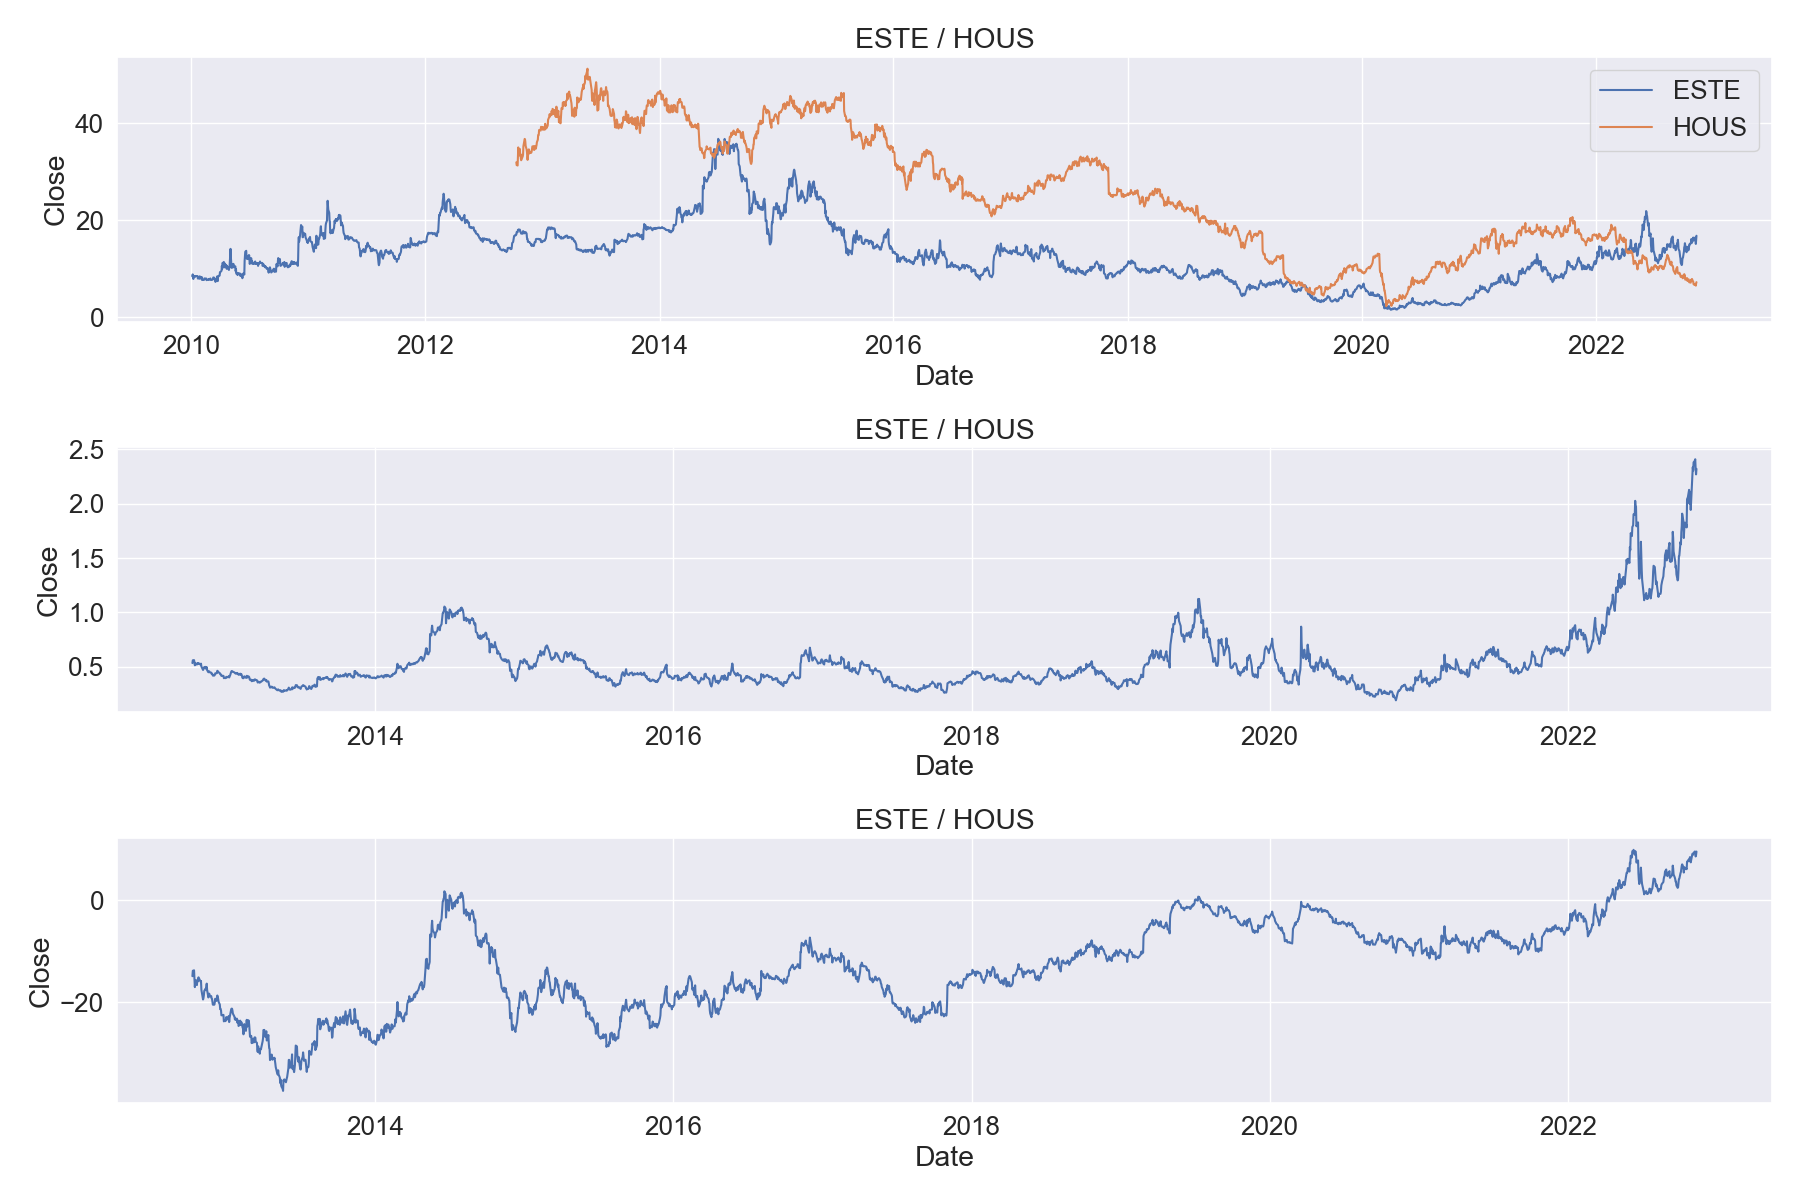

In [21]:
pair("ESTE", "HOUS", "LONG position ESTE P/E ratio=6.57, dividend: None, Gross profit: 343913",
     "SHORT position HOUS P/E ratio=3.13, dividend: None, Gross Profit: 3230000");